In [1]:
!pip install scvi-tools -U
!pip install scanpy
!pip3 install leidenalg

     |████████████████████████████████| 231 kB 8.2 MB/s 
     |████████████████████████████████| 242 kB 60.2 MB/s 
     |████████████████████████████████| 813 kB 50.0 MB/s 
     |████████████████████████████████| 678 kB 59.4 MB/s 
     |████████████████████████████████| 213 kB 63.7 MB/s 
     |████████████████████████████████| 91 kB 7.2 MB/s 
     |████████████████████████████████| 329 kB 53.6 MB/s 
     |████████████████████████████████| 132 kB 45.9 MB/s 
     |████████████████████████████████| 636 kB 69.2 MB/s 
     |████████████████████████████████| 829 kB 59.1 MB/s 
     |████████████████████████████████| 1.1 MB 82.6 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
     |████████████████████████████████| 160 kB 87.4 MB/s 
     |████████████████████████████████| 192 kB 72.6 MB/s 
     |████████████████████████████████| 271 kB 75.4 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19895 sha256=5ac0795120171314f3428e77d01da0228eacb8367b19c0efe0

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc # v1.6",
import sys
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path
import anndata
import seaborn as sns
import matplotlib as mpl
import scvi

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Global seed set to 0
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Restart
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/datasets')
gca = sc.read_h5ad('GCA_filtered.h5ad')

In [ ]:
gca_blood = gca[gca.obs.tissue.isin(['blood']),:]

In [ ]:
gca_blood.layers['counts'] = gca_blood.X.copy()

In [ ]:
sc.pp.normalize_total(gca_blood, target_sum=1e4)
sc.pp.log1p(gca_blood)

gca_blood.raw = gca_blood

sc.pp.highly_variable_genes(
    gca_blood,
    n_top_genes=2000,
    subset=True,
    flavor="seurat")

In [ ]:
scvi.data.setup_anndata(
    gca_blood,
    layer="counts",
    categorical_covariate_keys=["sample_id"]
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.layers["counts"]                                              


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)


INFO     Successfully registered anndata object containing 138203 cells, 2000 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [ ]:
model_gca = scvi.model.SCVI(gca_blood)

In [ ]:
model_gca.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 58/58: 100%|██████████| 58/58 [08:02<00:00,  8.31s/it, loss=147, v_num=1]


In [ ]:
latent = model_gca.get_latent_representation()
gca_blood.obsm["X_scVI"] = latent

gca_blood.layers["scvi_normalized"] = model_gca.get_normalized_expression(library_size=10e4)

In [ ]:
sc.pp.neighbors(gca_blood, use_rep="X_scVI")
sc.tl.leiden(gca_blood, resolution = 1.8)
sc.tl.umap(gca_blood, min_dist = 0.2)

In [ ]:
sc.tl.leiden(gca_blood, resolution = 2.5)

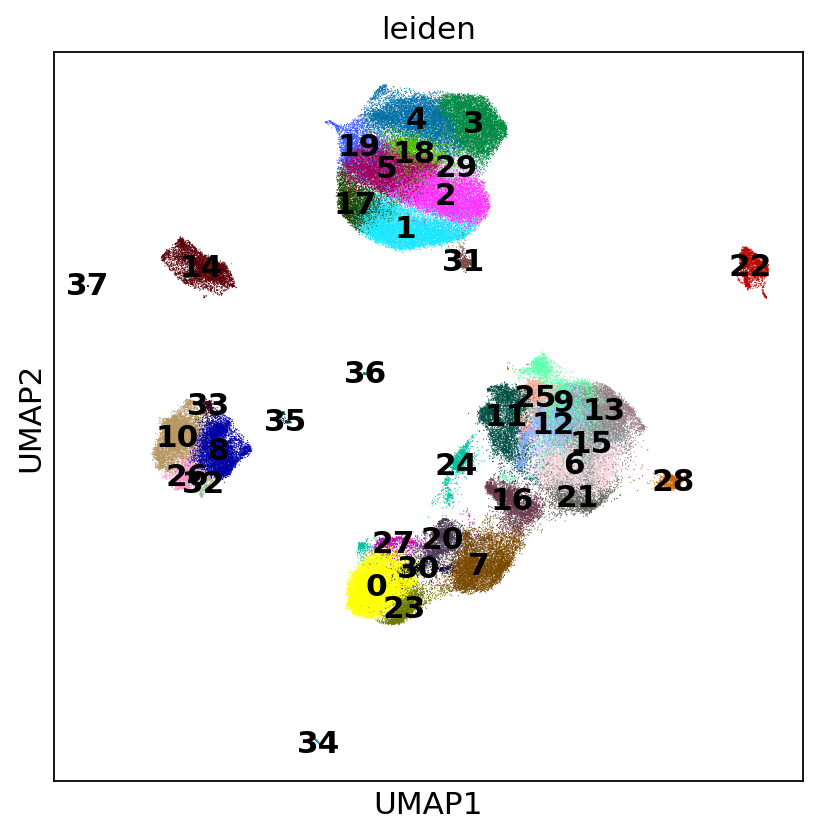

In [ ]:
plt.rcParams['figure.figsize'] = [6, 6]
sc.pl.umap(gca_blood, color=['leiden'], legend_loc = 'on data', size = 1)

In [ ]:
gca_blood.obs['blood_clustering'] = gca_blood.obs['leiden']

gca_blood.obs.replace({'blood_clustering':'0'},'NK_56hi', inplace=True)
gca_blood.obs.replace({'blood_clustering':'1'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'2'},'Treg', inplace=True)
gca_blood.obs.replace({'blood_clustering':'3'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'4'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'5'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'6'},'CD4_EM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'7'},'CD8_Eff', inplace=True)
gca_blood.obs.replace({'blood_clustering':'8'},'B_cell_imm', inplace=True)
gca_blood.obs.replace({'blood_clustering':'9'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'10'},'B_cell_imm', inplace=True)
gca_blood.obs.replace({'blood_clustering':'11'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'12'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'13'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'14'},'Platelets', inplace=True)
gca_blood.obs.replace({'blood_clustering':'15'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'16'},'CD8_naive', inplace=True)
gca_blood.obs.replace({'blood_clustering':'17'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'18'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'19'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'20'},'CD4_cytotoxic', inplace=True)
gca_blood.obs.replace({'blood_clustering':'21'},'Treg', inplace=True)
gca_blood.obs.replace({'blood_clustering':'22'},'DC', inplace=True)
gca_blood.obs.replace({'blood_clustering':'23'},'NK_56hi', inplace=True)
gca_blood.obs.replace({'blood_clustering':'24'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'25'},'CD4_naive_CM', inplace=True)
gca_blood.obs.replace({'blood_clustering':'26'},'B_cell_mat', inplace=True)
gca_blood.obs.replace({'blood_clustering':'27'},'NK_56lo', inplace=True)
gca_blood.obs.replace({'blood_clustering':'28'},'CD4_overlap', inplace=True)
gca_blood.obs.replace({'blood_clustering':'29'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'30'},'NK_56lo', inplace=True)
gca_blood.obs.replace({'blood_clustering':'31'},'CD14', inplace=True)
gca_blood.obs.replace({'blood_clustering':'32'},'B_cell_imm', inplace=True)
gca_blood.obs.replace({'blood_clustering':'33'},'B_cell_imm', inplace=True)
gca_blood.obs.replace({'blood_clustering':'34'},'RBC', inplace=True)
gca_blood.obs.replace({'blood_clustering':'35'},'Plasma', inplace=True)
gca_blood.obs.replace({'blood_clustering':'36'},'HSC', inplace=True)
gca_blood.obs.replace({'blood_clustering':'37'},'Epi', inplace=True)

In [ ]:
de_df = model_gca.differential_expression(groupby="leiden")
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/stats')
de_df.to_csv('blood_clustering_stats_leiden.csv')

DE...: 100%|██████████| 37/37 [02:20<00:00,  3.79s/it]


In [ ]:
temp = de_df.loc[de_df.comparison == '28 vs Rest']
temp[temp.non_zeros_proportion1>0.3].head(20)

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
MFSD1,0.9914,0.0086,4.747355,0.003952,0.000810,0.0,0.25,2.646032,2.686751,1.196774,-0.738074,10.872490,1.005271,0.348656,0.572935,0.231106,56.433266,9.373814,True,28 vs Rest,28,Rest
NEAT1,0.9912,0.0088,4.724163,0.095424,0.008419,0.0,0.25,4.474885,4.689698,2.173740,-4.603739,14.333483,15.184535,2.698031,0.994728,0.527166,1080.756958,83.429459,True,28 vs Rest,28,Rest
S100A9,0.9884,0.0116,4.445082,0.018369,0.046308,0.0,0.25,1.405561,2.460891,3.821804,-10.832823,11.823200,3.277677,20.745771,0.708260,0.482599,157.232452,460.356964,True,28 vs Rest,28,Rest
S100A8,0.9880,0.0120,4.410775,0.019806,0.063045,0.0,0.25,1.268995,2.487267,3.913438,-9.279383,11.054667,3.518451,25.728537,0.759227,0.487874,184.385757,653.484375,True,28 vs Rest,28,Rest
RPS19,0.9866,0.0134,4.299009,0.004479,0.057504,0.0,0.25,-3.336841,-3.454731,1.643870,-7.315880,6.272561,0.557118,15.533366,0.379613,0.941119,32.223030,603.268555,True,28 vs Rest,28,Rest
TMSB4X,0.9852,0.0148,4.198217,0.014438,0.059846,0.0,0.25,-2.072840,-2.136199,0.932819,-5.414882,6.079842,2.314585,20.888700,0.748682,0.986944,118.810265,645.826294,True,28 vs Rest,28,Rest
AHNAK,0.9830,0.0170,4.057395,0.034511,0.005814,0.0,0.25,3.143152,3.039015,1.637691,-1.953148,12.571301,4.246042,1.914261,0.875220,0.538842,230.051346,55.901493,True,28 vs Rest,28,Rest
RPS18,0.9828,0.0172,4.045496,0.003961,0.060864,0.0,0.25,-3.429890,-3.522619,1.787143,-7.533473,6.516636,0.546573,15.726371,0.374341,0.927925,30.009037,607.928101,True,28 vs Rest,28,Rest
VCAN,0.9806,0.0194,3.922891,0.055859,0.007628,0.0,0.25,6.015013,6.999439,4.024160,-6.017733,15.745967,11.230228,2.854481,0.957821,0.378337,615.234741,71.046616,True,28 vs Rest,28,Rest
SH3BGRL3,0.9788,0.0212,3.832326,0.004324,0.019009,0.0,0.25,-2.108639,-2.235489,1.084722,-5.439545,6.271537,0.650263,6.854253,0.381371,0.914592,36.146938,206.162170,True,28 vs Rest,28,Rest


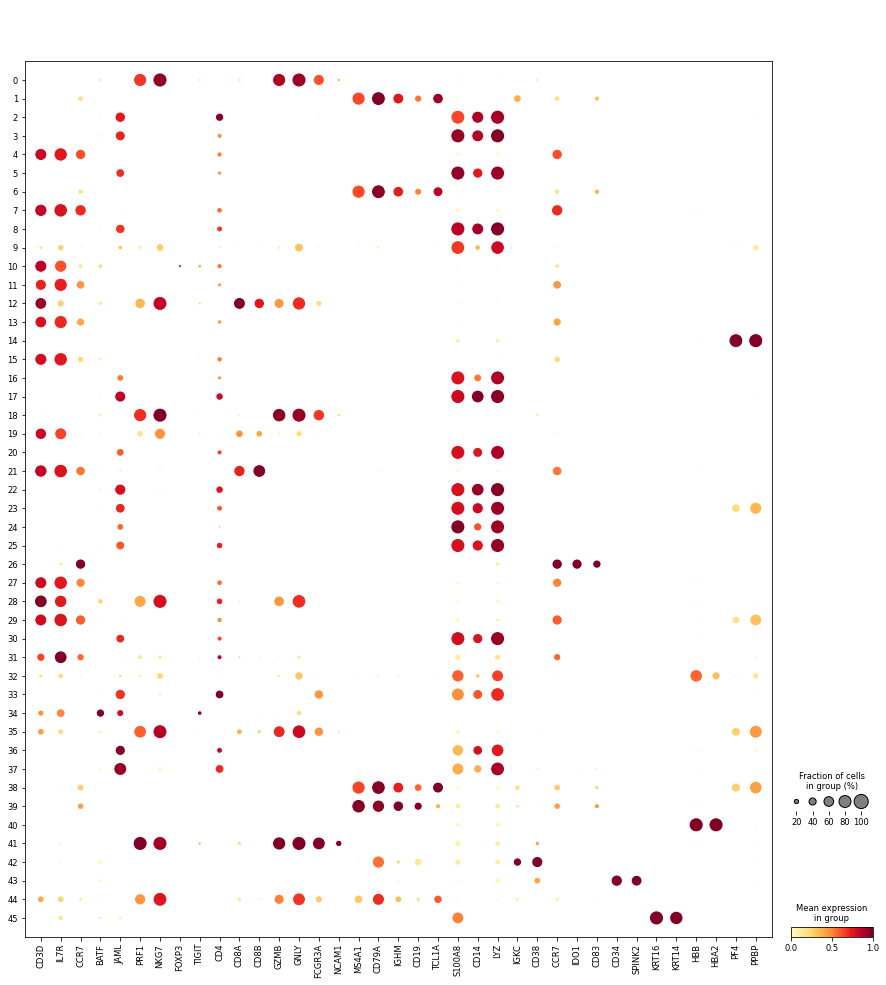

In [ ]:
sc.pl.DotPlot(gca_blood, ['CD3D', 'IL7R', 'CCR7', 
                      'BATF', 'JAML', 
                      'PRF1', 'NKG7',
                      'FOXP3', 'TIGIT', 'CD4',

                     'CD8A', 'CD8B', 'GZMB', 'GNLY', 
                     'FCGR3A','NCAM1',
                     'MS4A1', 'CD79A', 'IGHM', 'CD19','TCL1A',
                    'S100A8', 'CD14', 'LYZ', 'IGKC', 'CD38',
                
                     'CCR7', 'IDO1', 'CD83',
                     'CD34', 'SPINK2',
                     'KRT16', 'KRT14',
                     'HBB', 'HBA2',
                     'PF4', 'PPBP'], 
              groupby = 'leiden', standard_scale = 'var').style(cmap='YlOrRd',
                                                              dot_edge_color='white', 
                                                    dot_edge_lw=1).show()

In [ ]:
#checkpoint - initial clustering of blood data

os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data')
model_gca.save("blood_model_v23/", overwrite = True, save_anndata = True)
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/datasets')
gca_blood.write('GCA_blood_v2.h5ad', compression = 'gzip')

In [ ]:
##Restart
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/datasets')
gca_blood = sc.read_h5ad('GCA_blood.h5ad')
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data')
model_gca = scvi.model.SCVI.load("blood_model_v2/", gca_blood, use_gpu=True)

INFO     Using data from adata.layers["counts"]                                              


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


INFO     Registered keys:['X', 'batch_indices', 'labels', 'cat_covs']                        
INFO     Successfully registered anndata object containing 131236 cells, 2000 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."
/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


In [ ]:
###Subclustering DCs and monocytes***

mono = gca_blood[gca_blood.obs.blood_clustering.isin(['CD14', 'DC']),:]
sc.pp.neighbors(mono, use_rep="X_scVI")
sc.tl.leiden(mono, resolution = 1)
sc.tl.umap(mono, min_dist = 0.2)
sc.tl.leiden(mono, resolution = 1.6)

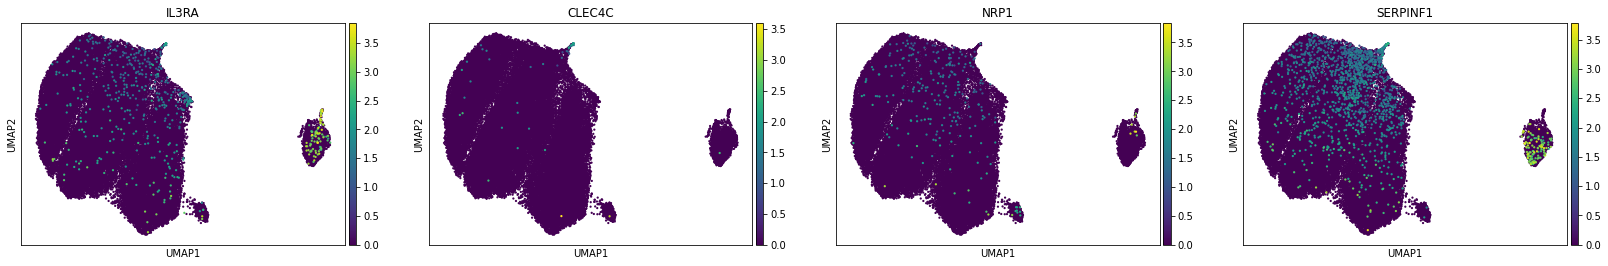

In [ ]:
sc.pl.umap(mono, color=['IL3RA', 'SERPINF1'], legend_loc = 'on data', size = 20)

In [ ]:
sc.tl.leiden(mono, resolution = 0.6, restrict_to = ('leiden', ['22']))

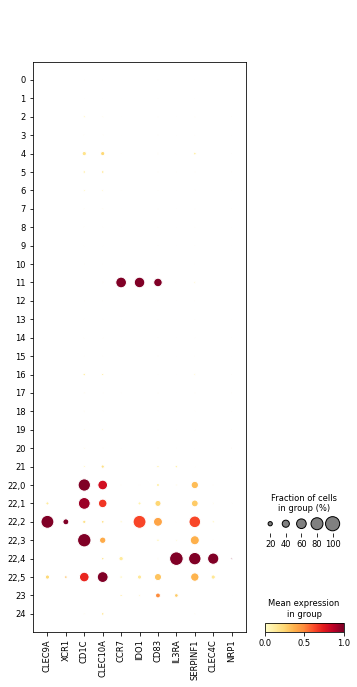

In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/figures')

sc.pl.DotPlot(mono, ['CLEC9A', 'XCR1',
                    'CD1C', 'CLEC10A',
                
                     'CCR7', 'IDO1', 'CD83', 'IL3RA', 'SERPINF1', 'CLEC4C', 'NRP1'], 
              groupby = 'leiden_R', standard_scale = 'var').style(cmap='YlOrRd',
                                                              dot_edge_color='white', 
                                                    dot_edge_lw=1).show()

In [ ]:
gca_blood.obs.blood_clustering = gca_blood.obs.blood_clustering.cat.add_categories(['cDC1', 'cDC2', 'pDC'])
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden_R == '22,0'].index.tolist()), 'blood_clustering'] = 'cDC2'
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden_R == '22,1'].index.tolist()), 'blood_clustering'] = 'cDC2'
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden_R == '22,2'].index.tolist()), 'blood_clustering'] = 'cDC1'
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden_R == '22,3'].index.tolist()), 'blood_clustering'] = 'cDC2'
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden_R == '22,4'].index.tolist()), 'blood_clustering'] = 'pDC'
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden_R == '22,5'].index.tolist()), 'blood_clustering'] = 'cDC2'

gca_blood.obs.blood_clustering = gca_blood.obs.blood_clustering.cat.add_categories('CD16')
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden == '21'].index.tolist()), 'blood_clustering'] = 'CD16'

gca_blood.obs.blood_clustering = gca_blood.obs.blood_clustering.cat.add_categories('mDC')
gca_blood.obs.loc[gca_blood.obs.index.isin(mono.obs[mono.obs.leiden.isin(['11', '23'])].index.tolist()), 'blood_clustering'] = 'mDC'

In [ ]:
gca_blood_filtered = gca_blood[~(gca_blood.obs.blood_clustering.isin(['Doublet'])),:]
gca_blood_filtered.obs['blood_clustering'] = gca_blood_filtered.obs.blood_clustering.astype(str) + '_blood' 

Trying to set attribute `.obs` of view, copying.


In [ ]:
gca_blood_filtered.obs.blood_clustering = gca_blood_filtered.obs.blood_clustering.astype('category')
gca_blood_filtered.obs.blood_clustering.cat.categories

Index(['B_cell_imm_blood', 'B_cell_mat_blood', 'CD14_blood', 'CD16_blood',
       'CD4_EM_blood', 'CD4_cytotoxic_blood', 'CD4_naive_CM_blood',
       'CD4_overlap_blood', 'CD8_Eff_blood', 'CD8_naive_blood', 'Epi_blood',
       'HSC_blood', 'NK_56hi_blood', 'NK_56lo_blood', 'Plasma_blood',
       'Platelets_blood', 'RBC_blood', 'Treg_blood', 'cDC1_blood',
       'cDC2_blood', 'mDC_blood', 'pDC_blood'],
      dtype='object')

In [12]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/')
colours = pd.read_csv('colours.csv', index_col = 0)

In [13]:
set(gca_blood_filtered.obs.blood_clustering.cat.categories) - set(colours[colours.anno.str.contains('_blood')].anno.tolist())

set()

In [14]:
#reorder categories using colour csv

gca_blood_filtered.obs.blood_clustering = gca_blood_filtered.obs.blood_clustering.cat.reorder_categories(colours[colours.anno.str.contains('_blood')].anno.tolist())

In [ ]:
#add colour using colour csv

gca_blood_filtered.uns['blood_clustering_colors'] = np.array(colours[colours.anno.str.contains('_blood')].colors.tolist())

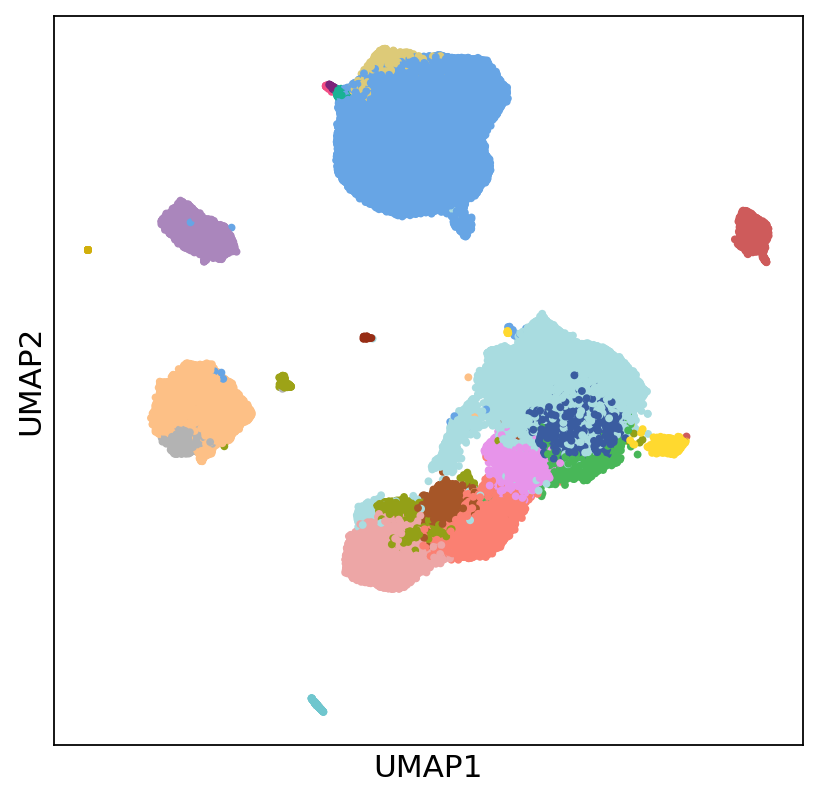

In [ ]:
sc.set_figure_params(dpi=80, dpi_save = 300)
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/figures')

plt.rcParams['figure.figsize'] = [6, 6]
sc.pl.umap(gca_blood_filtered, color=['blood_clustering'], legend_loc = '', size = 50, title = '')

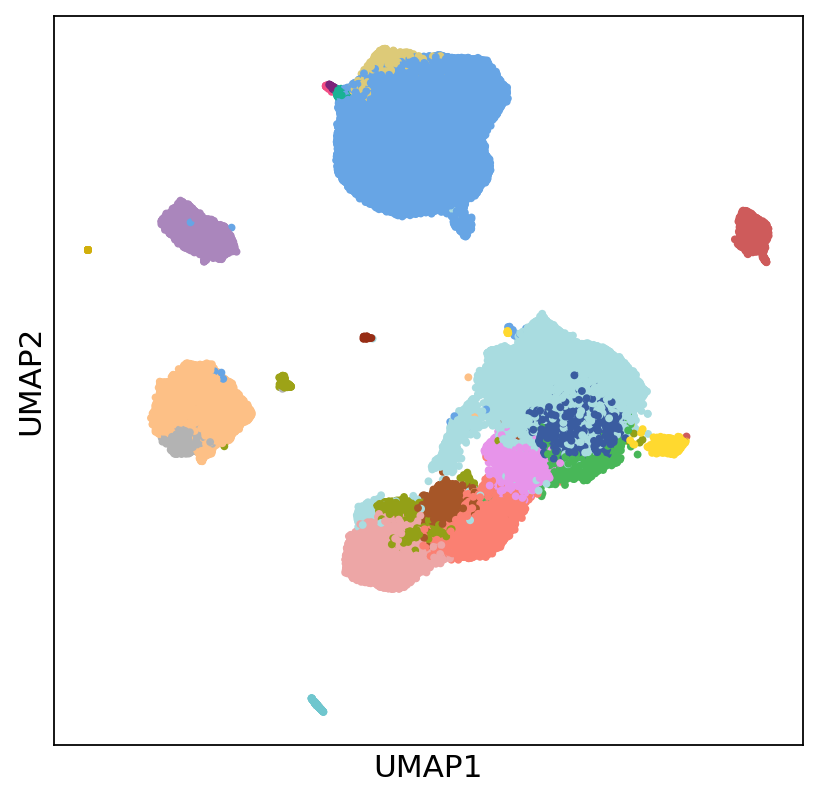

In [ ]:
sc.set_figure_params(dpi=80, dpi_save = 300)
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/figures')

plt.rcParams['figure.figsize'] = [6, 6]
sc.pl.umap(gca_blood_filtered, color=['blood_clustering'], legend_loc = '', size = 50, title = '', save = 'blood_clusters_umap.png')


In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/stats')
gca_blood.obs[['blood_clustering']].to_csv('blood_clustering.csv')

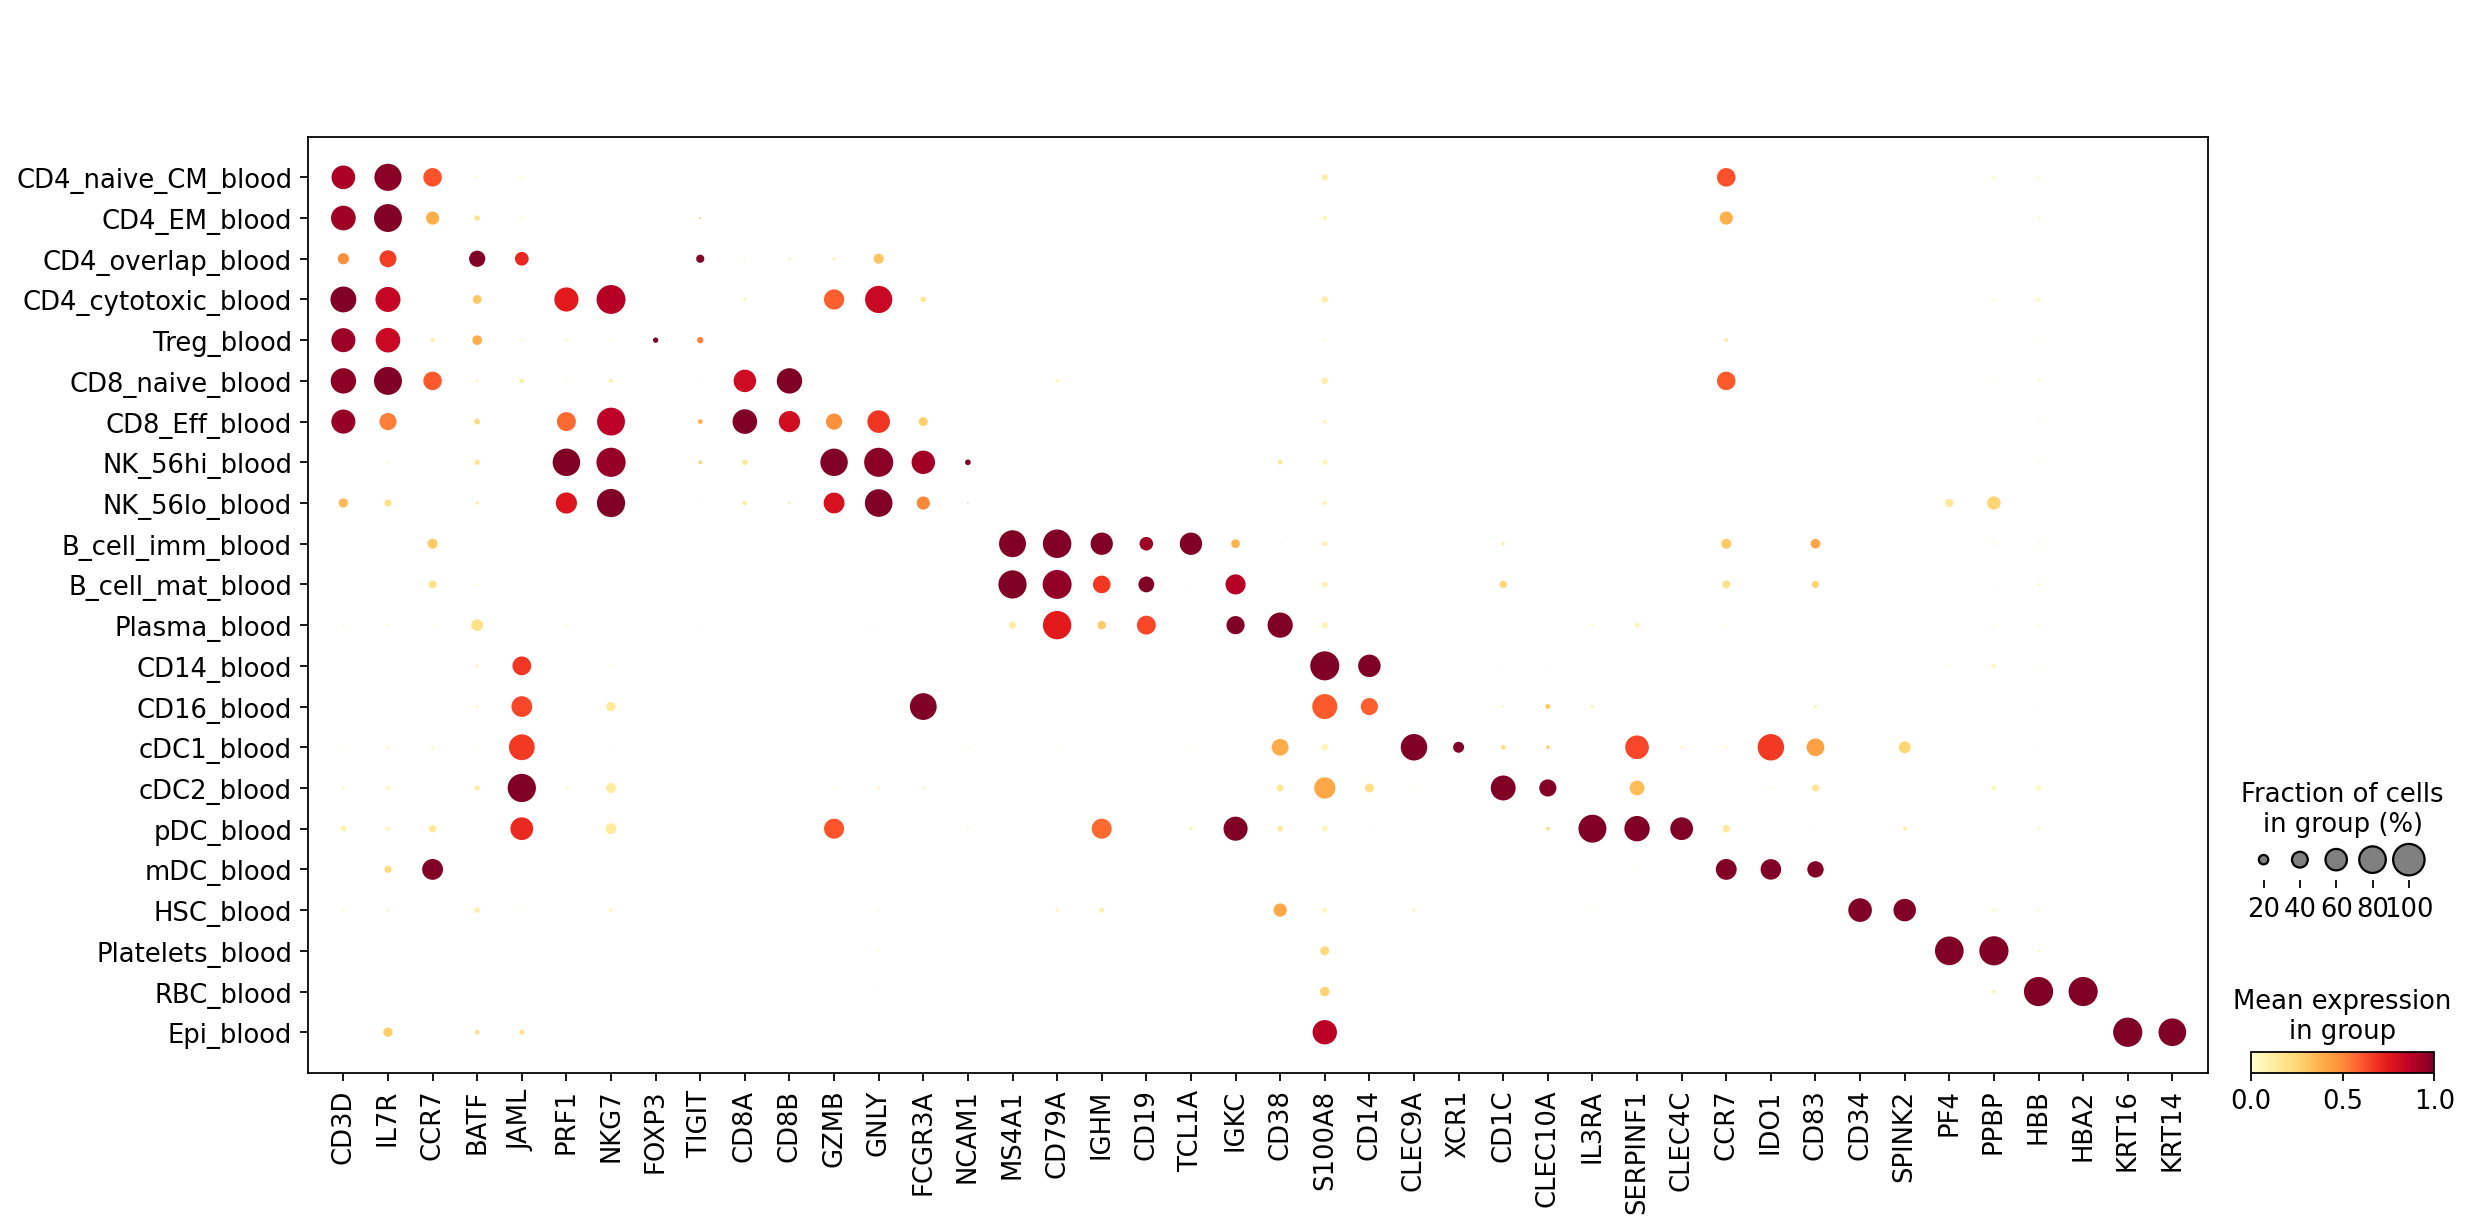

In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/figures')

sc.pl.DotPlot(gca_blood_filtered, ['CD3D', 'IL7R', 'CCR7', 
                      'BATF', 'JAML', 
                      'PRF1', 'NKG7',
                      'FOXP3', 'TIGIT',

                     'CD8A', 'CD8B', 'GZMB', 'GNLY', 
                     'FCGR3A','NCAM1',
                     'MS4A1', 'CD79A', 'IGHM', 'CD19','TCL1A',
                     'IGKC', 'CD38',
                    'S100A8', 'CD14',
                    'CLEC9A', 'XCR1',
                    'CD1C', 'CLEC10A',
                    'IL3RA', 'SERPINF1', 'CLEC4C',
                
                     'CCR7', 'IDO1', 'CD83',
                     'CD34', 'SPINK2',
                     'PF4', 'PPBP', 
                     'HBB', 'HBA2',
                     'KRT16', 'KRT14'
], 
              groupby = 'blood_clustering', standard_scale = 'var').style(cmap='YlOrRd',
                                                              dot_edge_color='white', 
                                                    dot_edge_lw=1).savefig('blood_clustering.png')

In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/datasets')
gca_blood_filtered.write('GCA_blood_filtered.h5ad', compression = 'gzip')

In [ ]:
#restart for plotting
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/datasets')
gca_blood_filtered = sc.read_h5ad('GCA_blood_filtered.h5ad')

In [15]:
gca_blood_filtered = gca_blood_filtered[gca_blood_filtered.obs.blood_clustering != 'Epi_blood',:]

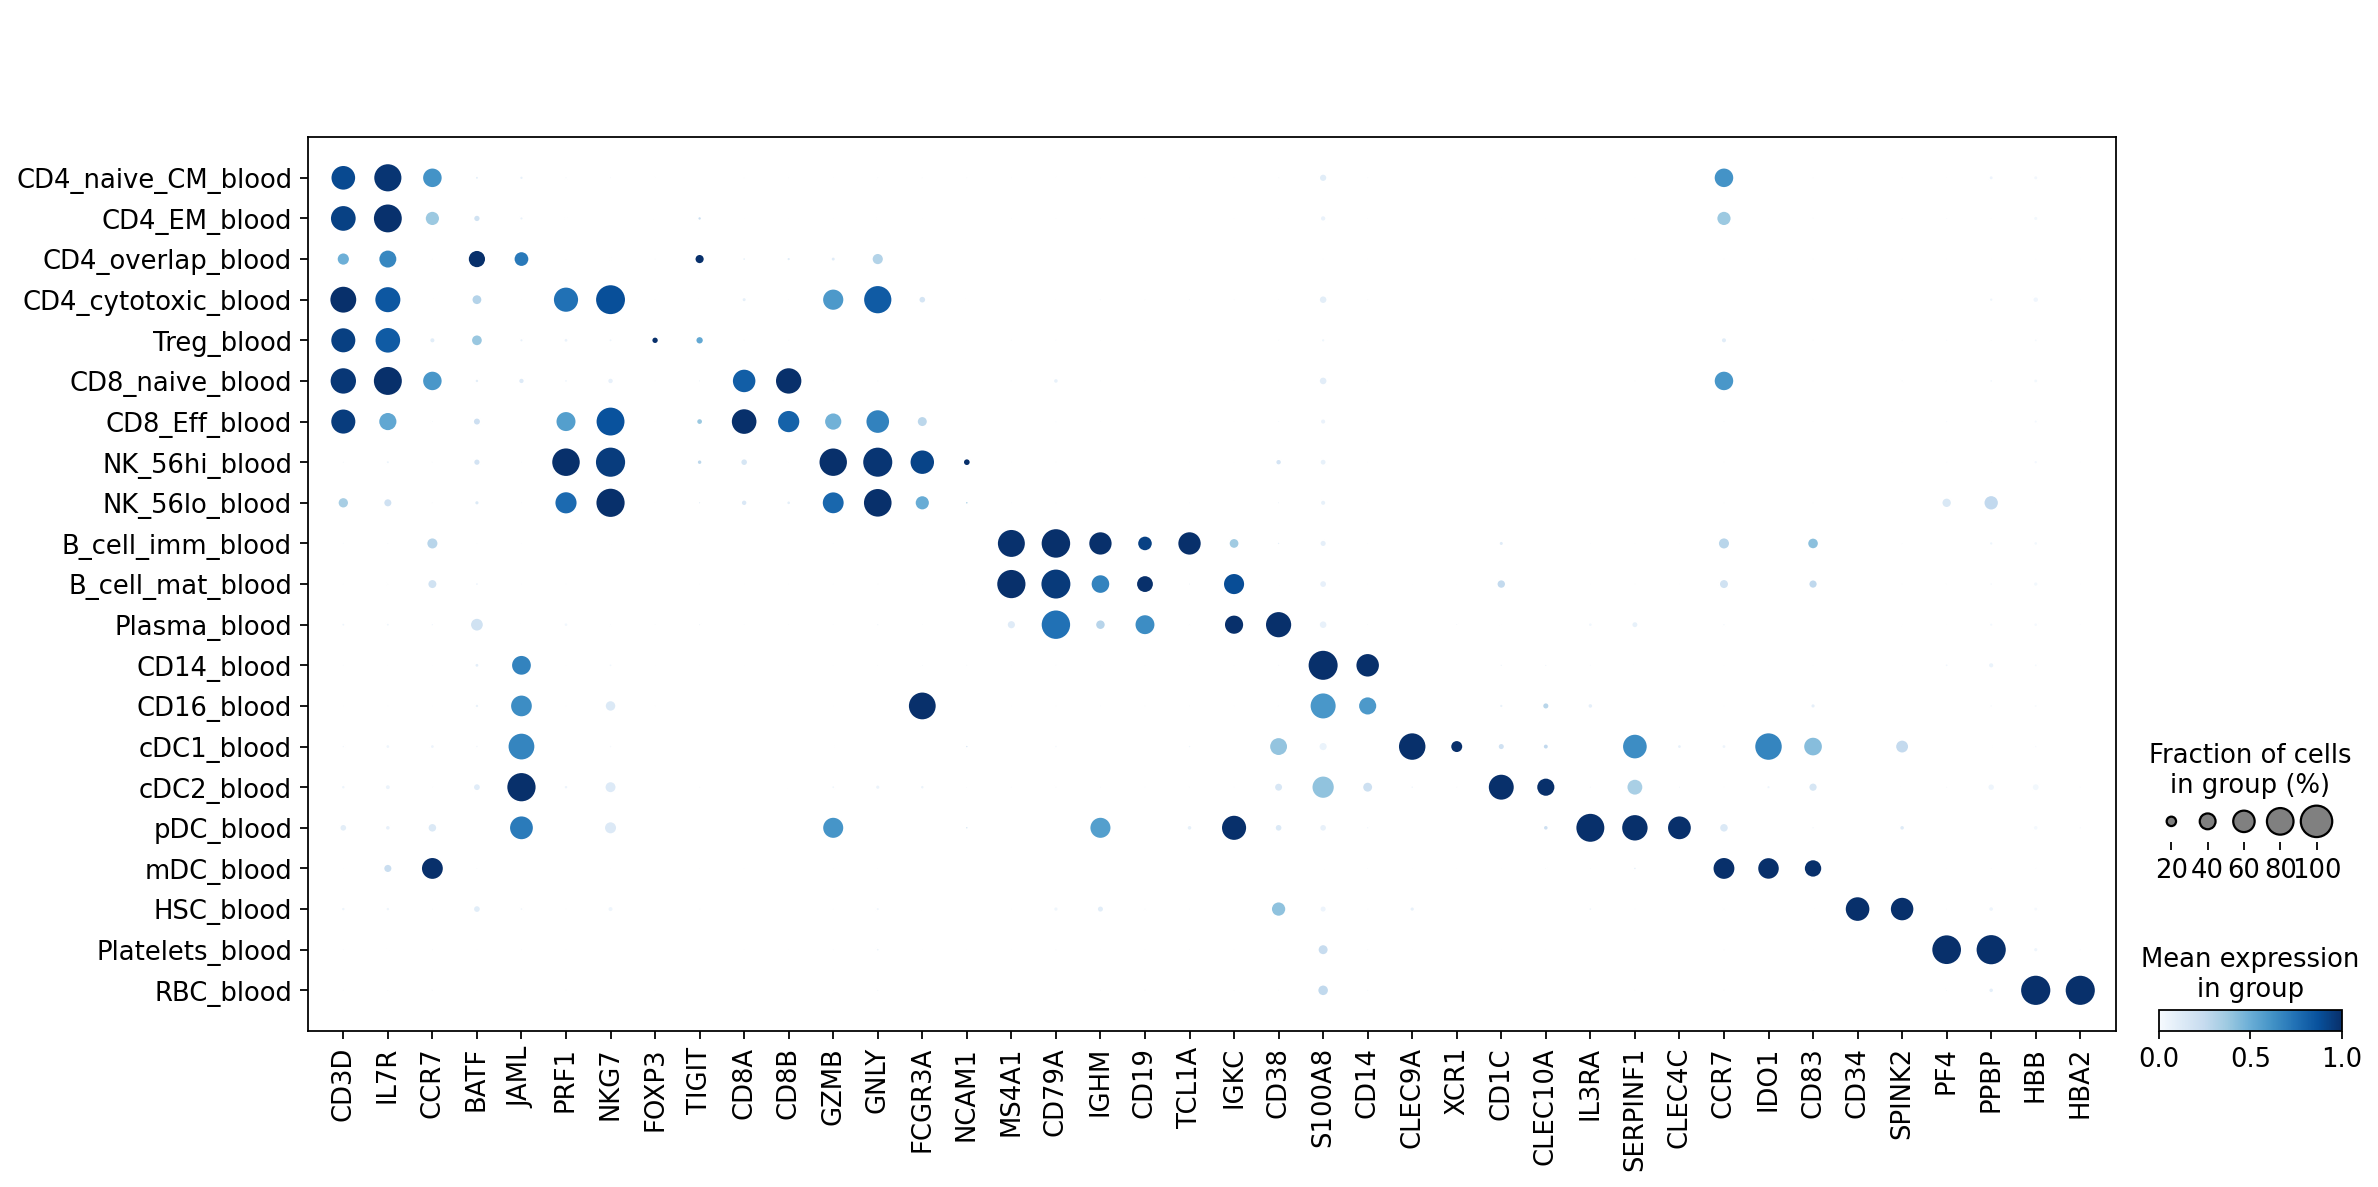

In [16]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/figures')

sc.set_figure_params(dpi=80, dpi_save = 300)

sc.pl.DotPlot(gca_blood_filtered, ['CD3D', 'IL7R', 'CCR7', 
                      'BATF', 'JAML', 
                      'PRF1', 'NKG7',
                      'FOXP3', 'TIGIT',

                     'CD8A', 'CD8B', 'GZMB', 'GNLY', 
                     'FCGR3A','NCAM1',
                     'MS4A1', 'CD79A', 'IGHM', 'CD19','TCL1A',
                     'IGKC', 'CD38',
                    'S100A8', 'CD14',
                    'CLEC9A', 'XCR1',
                    'CD1C', 'CLEC10A',
                'IL3RA', 'SERPINF1', 'CLEC4C',
                     'CCR7', 'IDO1', 'CD83',
                     'CD34', 'SPINK2',
                     'PF4', 'PPBP', 
                     'HBB', 'HBA2'
], 
              groupby = 'blood_clustering', standard_scale = 'var').style(cmap='Blues',
                                                              dot_edge_color='white', 
                                                    dot_edge_lw=1).savefig('blood_clustering_dotplot.png')

In [11]:
#restart for plotting
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/datasets')
gca_blood_filtered = sc.read_h5ad('GCA_blood_filtered.h5ad')

In [ ]:
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data')
model_gca = scvi.model.SCVI.load("blood_model_v2/", gca_blood_filtered, use_gpu=True)

INFO     Using data from adata.layers["counts"]                                              


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function transfer_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


INFO     Registered keys:['X', 'batch_indices', 'labels', 'cat_covs']                        
INFO     Successfully registered anndata object containing 131236 cells, 2000 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."
/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


In [ ]:
gca_blood_filtered.layers['counts']

<131236x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 8260464 stored elements in Compressed Sparse Row format>

In [ ]:
de_df = model_gca.differential_expression(groupby="blood_clustering")
os.chdir('/content/drive/MyDrive/jupyterdata/GCA_data/stats')
de_df.to_csv('blood_clustering_stats_post_clustering.csv')

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:   5%|▍         | 1/22 [00:03<01:18,  3.73s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:   9%|▉         | 2/22 [00:07<01:15,  3.76s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  14%|█▎        | 3/22 [00:11<01:11,  3.78s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  18%|█▊        | 4/22 [00:15<01:07,  3.78s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  23%|██▎       | 5/22 [00:18<01:04,  3.77s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  27%|██▋       | 6/22 [00:22<01:00,  3.77s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  32%|███▏      | 7/22 [00:26<00:56,  3.78s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  36%|███▋      | 8/22 [00:30<00:53,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  41%|████      | 9/22 [00:34<00:49,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  45%|████▌     | 10/22 [00:37<00:45,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  50%|█████     | 11/22 [00:41<00:41,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  55%|█████▍    | 12/22 [00:45<00:37,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  59%|█████▉    | 13/22 [00:49<00:34,  3.81s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  64%|██████▎   | 14/22 [00:53<00:30,  3.81s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  68%|██████▊   | 15/22 [00:56<00:26,  3.82s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  73%|███████▎  | 16/22 [01:00<00:22,  3.81s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  77%|███████▋  | 17/22 [01:04<00:19,  3.81s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  82%|████████▏ | 18/22 [01:08<00:15,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  86%|████████▋ | 19/22 [01:12<00:11,  3.80s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  91%|█████████ | 20/22 [01:15<00:07,  3.81s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...:  95%|█████████▌| 21/22 [01:19<00:03,  3.83s/it]

/usr/local/lib/python3.7/dist-packages/scvi/model/base/_base_model.py:151: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  "Make sure the registered X field in anndata contains unnormalized count data."


DE...: 100%|██████████| 22/22 [01:23<00:00,  3.80s/it]
